Bureau of Economic Analysis API with Python
=====

## Composition of Construction Industry Gross Output


Example of using the BEA's API to retrieve data on which series are available and to retrieve the values for those series.

Updated: February 4, 2018 -- Added second example--pulling GDP release tables

The BEA API documentation is available [here](https://www.bea.gov/API/bea_web_service_api_user_guide.htm)

In [1]:
import requests
import pandas as pd
import config   ## File with API key

api_key = config.bea_key

### Gather data on value parameters in order to make request

In [2]:
# Components of request
base = 'https://www.bea.gov/api/data/?&UserID={}'.format(api_key)
get_param = '&method=GetParameterValues'
dataset = '&DataSetName=GDPbyIndustry'
param = 'TableID'

In [3]:
# Construct URL from parameters above
url = '{}{}{}&ParameterName={}&ResultFormat=json'.format(base, get_param, dataset, param)

# Request parameter information from BEA API
r = requests.get(url).json()

# Show the results as a table:
pd.DataFrame(r['BEAAPI']['Results']['ParamValue']).set_index('Key')

,Desc
Key,
1,Value Added by Industry (A) (Q)
5,Value Added by Industry as a Percentage of Gro...
6,Components of Value Added by Industry (A)
7,Components of Value Added by Industry as a Per...
8,Chain-Type Quantity Indexes for Value Added by...
9,Percent Changes in Chain-Type Quantity Indexes...
10,Real Value Added by Industry (A) (Q)
11,Chain-Type Price Indexes for Value Added by In...
12,Percent Changes in Chain-Type Price Indexes fo...


In [4]:
param = 'Industry'

# Construct URL from parameters above
url = '{}{}{}&ParameterName={}&ResultFormat=json'.format(base, get_param, dataset, param)

# Request parameter information from BEA API
r = requests.get(url).json()

# Show the results as a table:
pd.DataFrame(r['BEAAPI']['Results']['ParamValue']).set_index('Key')

,Desc
Key,
GDP,"Gross domestic product (A,Q)"
II,"All industries (A,Q)"
PVT,"Private industries (A,Q)"
11,"Agriculture, forestry, fishing, and hunting (A,Q)"
111CA,Farms (A)
113FF,"Forestry, fishing, and related activities (A)"
21,"Mining (A,Q)"
211,Oil and gas extraction (A)
212,"Mining, except oil and gas (A)"


### Use parameters obtained above to request data from API

In [5]:
m = '&method=GetData'
ind = '&TableId=25'
freq = '&Frequency=A'
year = '&Year=ALL'
fmt = '&ResultFormat=json'
indus = '&Industry=23'  # Construction Industry

# Combined url for request
url = '{}{}{}{}{}{}{}{}'.format(base, m, dataset, year, indus, ind, freq, fmt)

In [6]:
r = requests.get(url).json()

In [7]:
df = pd.DataFrame(r['BEAAPI']['Results']['Data'])
df = df.replace('Construction', 'Gross Output')
df = df.set_index([pd.to_datetime(df['Year']), 'IndustrYDescription'])['DataValue'].unstack(1)
df = df.apply(pd.to_numeric)
df.tail()

IndustrYDescription,Compensation of employees,Energy inputs,Gross Output,Gross operating surplus,Intermediate inputs,Materials inputs,Purchased-services inputs,Taxes on production and imports less subsidies,Value added
Year,,,,,,,,,
2012-01-01,366.6,32.3,1069.9,209.8,486.2,374.7,79.3,7.2,583.6
2013-01-01,388.0,32.5,1139.7,225.3,518.9,400.5,85.9,7.5,620.8
2014-01-01,422.6,29.4,1244.5,243.8,570.0,441.3,99.3,8.0,674.4
2015-01-01,458.0,22.2,1355.5,273.4,615.6,473.0,120.4,8.5,739.9
2016-01-01,486.7,23.0,1442.0,297.0,649.5,497.5,129.0,8.8,792.5


## Plot Employee share of gross profit

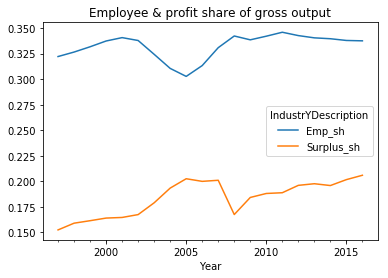

In [8]:
df['Emp_sh'] = df['Compensation of employees'] / df['Gross Output']
df['Surplus_sh'] = df['Gross operating surplus'] / df['Gross Output']

%matplotlib inline
df[['Emp_sh', 'Surplus_sh']].plot(title='Employee & profit share of gross output')

### GDP Report Data - Real PCE by Major Type of Product

REQUIRES PYTHON 3.6+

In [1]:
import requests
import pandas as pd
import config   ## File with API key

In [2]:
# Real PCE by Major Type of Product: NIPA Table 2.3.6.
tbl = 'T20306'
# Components of request
base = f'https://www.bea.gov/api/data/?&UserID={config.bea_key}'
dset = '&method=GetData&datasetname=NIPA'
freq = '&Frequency=Q'
year = '&Year=2017' # {",".join([str(i) for i in range(2005,2018)])}
fmt = '&ResultFormat=json'
url = f'{base}{dset}&TableName={tbl}{freq}{year}{fmt}'

In [3]:
# Request data
full_table = requests.get(url).json()['BEAAPI']['Results']['Data']
#r = [s for s in full_table if s['SeriesCode'] in t[1]]
#idx1 = [pd.to_datetime(i['TimePeriod']) for i in r]
#idx2 = [i['SeriesCode'] for i in r]
#df = pd.DataFrame(r, index=[idx1, idx2], columns=['DataValue']).unstack(1)
#df['DataValue'].loc['2000-01-01':].to_csv(f'{t[0]}.csv', index_label='DATE')

In [4]:
full_table

[{'CL_UNIT': 'Level',
  'DataValue': '11,758,040',
  'LineDescription': 'Personal consumption expenditures (PCE)',
  'LineNumber': '1',
  'METRIC_NAME': 'Chained Dollars',
  'SeriesCode': 'DPCERX',
  'TableID': '66',
  'TableName': 'T20306',
  'TimePeriod': '2017Q1',
  'UNIT_MULT': '6'},
 {'CL_UNIT': 'Level',
  'DataValue': '11,852,958',
  'LineDescription': 'Personal consumption expenditures (PCE)',
  'LineNumber': '1',
  'METRIC_NAME': 'Chained Dollars',
  'SeriesCode': 'DPCERX',
  'TableID': '66',
  'TableName': 'T20306',
  'TimePeriod': '2017Q2',
  'UNIT_MULT': '6'},
 {'CL_UNIT': 'Level',
  'DataValue': '11,916,576',
  'LineDescription': 'Personal consumption expenditures (PCE)',
  'LineNumber': '1',
  'METRIC_NAME': 'Chained Dollars',
  'SeriesCode': 'DPCERX',
  'TableID': '66',
  'TableName': 'T20306',
  'TimePeriod': '2017Q3',
  'UNIT_MULT': '6'},
 {'CL_UNIT': 'Level',
  'DataValue': '12,028,061',
  'LineDescription': 'Personal consumption expenditures (PCE)',
  'LineNumber': '1